In [1]:
from drdmannturb.calibration import CalibrationProblem
from drdmannturb.data_generator import OnePointSpectraDataGenerator
from drdmannturb.shared.parameters import NNParameters, ProblemParameters, LossParameters, PhysicalParameters

import torch
import torch.nn as nn
import numpy as np

L = 0.59
Gamma = 3.9
sigma = 3.4

domain = torch.logspace(-1, 2, 20)

In [2]:
pb = CalibrationProblem(
    nn_params = NNParameters(
        activations = [nn.GELU(), nn.GELU(), nn.GELU()]
    ),
    prob_params = ProblemParameters(),
    loss_params = LossParameters(),
    phys_params = PhysicalParameters(
        L=0.59,
        Gamma=3.9,
        sigma=3.4,
        domain=domain
    )
)

/Users/matthewmeeker/miniconda3/envs/KeithProject/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_82vavna4yl/croot/pytorch_1686931843901/work/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [3]:
parameters = pb.parameters
parameters[:3] = [
    np.log(L),
    np.log(Gamma),
    np.log(sigma)
]

pb.parameters = parameters[:len(pb.parameters)]

k1_data_pts = domain
DataPoints = [(k1, 1) for k1 in k1_data_pts]

In [4]:
Data = OnePointSpectraDataGenerator(data_points=DataPoints).Data

In [5]:
pb.eval(k1_data_pts)
pb.calibrate(data=Data)


Calibrating MannNet...
torch.Size([80])
Initial loss:  0.11969207666942294

[Calibration.py -- calibrate]-> Epoch 0

loss  =  0.11969207666942294
loss  =  0.07707454992586589
loss  =  0.06954747668989249
loss  =  0.06345006421463914
loss  =  0.0376301352943096
loss  =  0.03761761738330146
loss  =  0.03756281977546127
loss  =  0.03713258733690071
loss  =  0.03709939139979264
loss  =  0.03690856191355569
loss  =  0.036889812814573986
loss  =  0.03674205731075728
loss  =  0.03664048439654474
loss  =  0.03595832491274979
loss  =  0.03578934504703538
loss  =  0.03478984376145849
loss  =  0.034537642006839675
loss  =  0.033534414030194554
loss  =  0.03279391563851734
loss  =  0.02757770828314513
loss  =  0.026682759718223266
loss  =  0.02544344025772991
loss  =  0.024424864322111113
loss  =  0.023929963070169667
loss  =  0.02367398298914731
---------------------------------



[Calibration.py -- calibrate]-> Epoch 1



/Users/matthewmeeker/miniconda3/envs/KeithProject/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


loss  =  0.02367398298914731
loss  =  0.023469357189433247
loss  =  0.023270932756949712
loss  =  0.022846781238358045
loss  =  0.02274827754511955
loss  =  0.02268137434590604
loss  =  0.022271721716594785
loss  =  0.02222580024745708
loss  =  0.021923550869629
loss  =  0.021866724761119175
loss  =  0.021493339726777864
loss  =  0.021420678824496366


KeyboardInterrupt: 

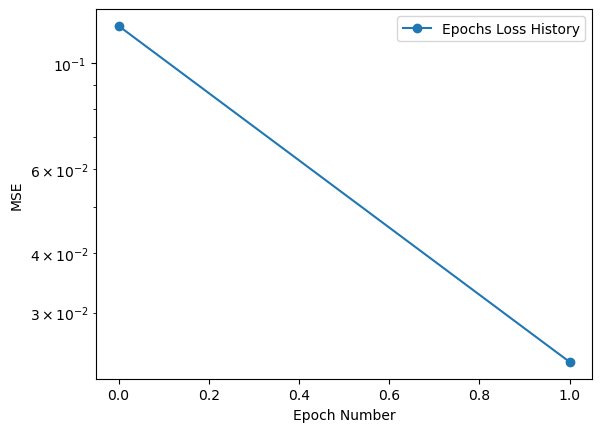

NameError: name 'time' is not defined

In [7]:
import matplotlib.pyplot as plt
plt.figure()

plt.plot(pb.loss_history_epochs, "o-", label="Epochs Loss History")
plt.legend()
plt.xlabel("Epoch Number")
plt.ylabel("MSE")
plt.yscale("log")

plt.show()